# A comparison of GRNs from biological replicates (TDR118 vs TDR119, both from 15-somites stage, 16hpf)

- Author: Yang-Joon Kim
- last updated: 10/19/2023

## Goals
- (1) comparative analysis on the two GRNs from biological replicates - using the network topology metrics (i.e. degree centrality, etc.)
- (2) [TBD] EDA on other metrics
- (3) [TBD] EDA on the network motifs?

In [3]:
# 0. Import

import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

In [2]:
import celloracle as co
co.__version__

/home/yang-joon.kim/.conda/envs/celloracle_env/lib/python3.8/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/home/yang-joon.kim/.conda/envs/celloracle_env/lib/python3.8/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str

'0.14.0'

In [5]:
# visualization settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 600

In [ ]:
figpath = "/hpc/projects/data.science/yangjoon.kim/"

## Step 1. Import the GRN (Links object)

In [4]:
# import the GRNs (Links objects)
TDR118_GRN = co.load_hdf5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR118_cicero_output/08_TDR118_celltype_GRNs.celloracle.links")
TDR119_GRN = co.load_hdf5("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR119_cicero_output/08_TDR119_celltype_GRNs.celloracle.links")


In [6]:
# extract the network topology scores (i.e. degree_centrality_all)
df_GRN1 = TDR118_GRN.merged_score
df_GRN2 = TDR119_GRN.merged_score

In [11]:
# subset the dataframes for specific cell-type
celltype = "Somites"

df1 = df_GRN1[df_GRN1.cluster==celltype]
df2 = df_GRN2[df_GRN2.cluster==celltype]


,degree_all,degree_in,degree_out,clustering_coefficient,clustering_coefficient_weighted,degree_centrality_all,degree_centrality_in,degree_centrality_out,betweenness_centrality,closeness_centrality,eigenvector_centrality,page_rank,assortative_coefficient,average_path_length,community_random_walk,module,connectivity,participation,role,cluster
hmga1a,82,54,28,0.051235,0.075251,0.177489,0.116883,0.060606,7442,0.044194,1.000000,0.016953,-0.252688,0.103542,1,0,5.905457,0.395976,Connector Hub,Somites
lef1,11,2,9,0.111111,0.073605,0.023810,0.004329,0.019481,105,0.050079,0.049300,0.001519,-0.252688,0.103542,2,4,0.136950,0.460000,Peripheral,Somites
sox3,27,1,26,0.099715,0.079824,0.058442,0.002165,0.056277,747,0.058577,0.256465,0.001426,-0.252688,0.103542,1,0,1.004137,0.466392,Peripheral,Somites
tbx2b,5,0,5,0.000000,0.000000,0.010823,0.000000,0.010823,0,4.160307,0.066321,0.001394,-0.252688,0.103542,4,0,-0.520719,0.480000,Peripheral,Somites
meis2a,10,0,10,0.000000,0.000000,0.021645,0.000000,0.021645,0,0.036771,0.052976,0.001394,-0.252688,0.103542,1,1,0.048853,0.740000,Connector,Somites
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tnni2b.1,1,1,0,0.000000,0.000000,0.002165,0.002165,0.000000,0,NaN,0.000528,0.001471,-0.252688,0.103542,31,4,-0.735317,0.000000,Ultra peripheral,Somites
fam49al,1,1,0,0.000000,0.000000,0.002165,0.002165,0.000000,0,NaN,0.003433,0.001424,-0.252688,0.103542,2,4,-0.735317,0.000000,Ultra peripheral,Somites
ednrab,1,1,0,0.000000,0.000000,0.002165,0.002165,0.000000,0,NaN,0.004256,0.001424,-0.252688,0.103542,1,0,-0.738555,0.000000,Ultra peripheral,Somites
tubb5,1,1,0,0.000000,0.000000,0.002165,0.002165,0.000000,0,NaN,0.021962,0.001499,-0.252688,0.103542,1,0,-0.738555,0.000000,Ultra peripheral,Somites


In [42]:
df_GRN1.cluster.unique()

array(['Adaxial_Cells', 'Differentiating_Neurons', 'Endoderm',
       'Epidermal', 'Lateral_Mesoderm', 'Muscle', 'NMPs',
       'Neural_Anterior', 'Neural_Crest', 'Neural_Posterior', 'Notochord',
       'PSM', 'Somites', 'unassigned'], dtype=object)

Text(0.1, 0.9, 'Pearson Correlation: 0.81')

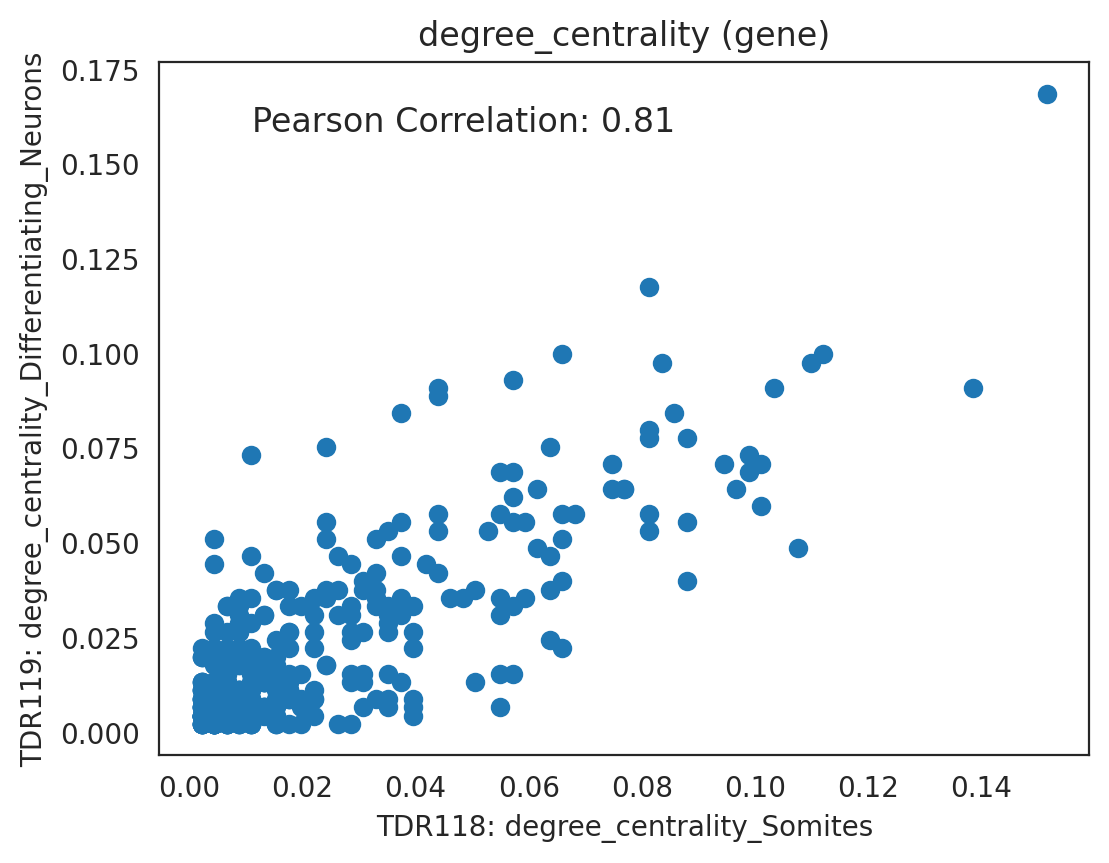

In [51]:
# subset the dataframes for specific cell-type
celltype1 = "Somites"
celltype2 = "Differentiating_Neurons"

df1 = df_GRN1[df_GRN1.cluster==celltype1]
df2 = df_GRN2[df_GRN2.cluster==celltype2]

# Step 1. Get a union of gene_names
gene_names = set(df1.index).union(df2.index)
len(gene_names)

# Step 2. Create a new dataframe with matching indices
new_df1 = df1[df1.index.isin(gene_names)]
new_df2 = df2[df2.index.isin(gene_names)]

# Step 3. Fill missing values with 0
new_df1 = new_df1.reindex(gene_names) #fill_value=0
new_df2 = new_df2.reindex(gene_names)

# Step 4. Create the zipped DataFrame
zipped_df = pd.DataFrame({'degree_centrality_all_df1': new_df1['degree_centrality_all'], 'degree_centrality_all_df2': new_df2['degree_centrality_all']})
zipped_df

# Step 5. Generate scatter plots, with Pearson correlation coeff.
plt.scatter(x=zipped_df.degree_centrality_all_df1,
            y=zipped_df.degree_centrality_all_df2)
plt.xlabel("TDR118: degree_centrality_" + celltype1)
plt.ylabel("TDR119: degree_centrality_" + celltype2)
plt.title("degree_centrality (gene)")


# Annotate the plot with the correlation coefficient
corr = zipped_df.degree_centrality_all_df1.corr(zipped_df.degree_centrality_all_df2,
                                                method = "pearson")
plt.annotate(f"Pearson Correlation: {corr:.2f}",
             xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)

In [54]:
df_GRN1

,degree_all,degree_in,degree_out,clustering_coefficient,clustering_coefficient_weighted,degree_centrality_all,degree_centrality_in,degree_centrality_out,betweenness_centrality,closeness_centrality,eigenvector_centrality,page_rank,assortative_coefficient,average_path_length,community_random_walk,module,connectivity,participation,role,cluster
hmga1a,44,33,11,0.090808,0.119625,0.096703,0.072527,0.024176,3136,0.151980,0.737335,0.005354,-0.209592,0.058377,5,5,3.245053,0.427258,Connector Hub,Adaxial_Cells
sp5l,14,0,14,0.098901,0.081013,0.030769,0.000000,0.030769,0,0.153270,0.394797,0.001441,-0.209592,0.058377,7,5,-0.022250,0.530612,Peripheral,Adaxial_Cells
fezf1,2,0,2,0.000000,0.000000,0.004396,0.000000,0.004396,0,12.194371,0.024093,0.001441,-0.209592,0.058377,13,1,-0.755418,0.500000,Peripheral,Adaxial_Cells
egr4,6,0,6,0.200000,0.138079,0.013187,0.000000,0.013187,0,0.138994,0.191435,0.001441,-0.209592,0.058377,7,3,-0.784647,0.722222,Connector,Adaxial_Cells
spi1b,5,0,5,0.000000,0.000000,0.010989,0.000000,0.010989,0,7.138646,0.112034,0.001441,-0.209592,0.058377,7,5,-0.874590,0.480000,Peripheral,Adaxial_Cells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pdzrn3b,1,1,0,0.000000,0.000000,0.002551,0.002551,0.000000,0,NaN,0.001937,0.001616,-0.104310,0.044720,27,6,-0.750000,0.000000,Ultra peripheral,unassigned
asph,2,2,0,0.000000,0.000000,0.005102,0.005102,0.000000,0,NaN,0.003067,0.001767,-0.104310,0.044720,6,2,-0.619219,0.000000,Ultra peripheral,unassigned
runx1t1,1,1,0,0.000000,0.000000,0.002551,0.002551,0.000000,0,NaN,0.002102,0.001647,-0.104310,0.044720,28,0,-0.928477,0.000000,Ultra peripheral,unassigned
eya1,1,1,0,0.000000,0.000000,0.002551,0.002551,0.000000,0,NaN,0.000000,0.002856,-0.104310,0.044720,10,3,0.000000,0.000000,Ultra peripheral,unassigned


In [55]:
celltypes = ['Adaxial_Cells', 'Differentiating_Neurons', 'Endoderm',
       'Epidermal', 'Lateral_Mesoderm', 'Muscle', 'NMPs',
       'Neural_Anterior', 'Neural_Crest', 'Neural_Posterior', 'Notochord',
       'PSM', 'Somites', 'unassigned']

# define empty series to save the correlation coefficients
corr_same_celltypes =[]
corr_diff_celltypes = []

df_GRN1

for ct1 in celltypes:
    for ct2 in celltypes:
        corr_coeff = compute_corr_betwn_GRNs(df_GRN1, df_GRN2, ct1, ct2, "degree_centrality_all")
        
        if ct1==ct2:
            corr_same_celltypes.append(corr_coeff)
        else:
            corr_diff_celltypes.append(corr_coeff)
            
corr_same_celltypes
corr_diff_celltypes

[0.5450655007563666,
 0.5853476008512595,
 0.566539212372232,
 0.6130351158359058,
 0.7618958479168609,
 0.6408880225258137,
 0.567698371375639,
 0.5463857207108809,
 0.5227677659187555,
 0.6207681097444215,
 0.7142179816361277,
 0.6899218673087959,
 0.47206480054506345,
 0.5721952726096596,
 0.8691712379271145,
 0.7554087225283174,
 0.7317894773065254,
 0.8015894969824751,
 0.7627952800315603,
 0.7987881951978686,
 0.8669714821269199,
 0.8224841754301014,
 0.7565152531532366,
 0.7664217545880767,
 0.8158569940982161,
 0.7937838900962725,
 0.5983753308306512,
 0.8546313017932117,
 0.8299252288188617,
 0.7991236955173523,
 0.8177850772321317,
 0.8070395634653654,
 0.8124340508248327,
 0.8771897583974205,
 0.8063640162250866,
 0.7942527669635814,
 0.822010026026329,
 0.8586713607500432,
 0.8268165659635698,
 0.5900300868110016,
 0.7803896558019708,
 0.8718917296817005,
 0.8682379404830923,
 0.8054743953281073,
 0.7252438321055195,
 0.8575584536643458,
 0.8502315143771398,
 0.821781135913

In [71]:
bin_width = 0.01

# Calculate the number of bins for each histogram
num_bins1 = int((max(corr_same_celltypes) - min(corr_same_celltypes)) / bin_width)
num_bins2 = int((max(corr_diff_celltypes) - min(corr_diff_celltypes)) / bin_width)


In [72]:
num_bins1

3

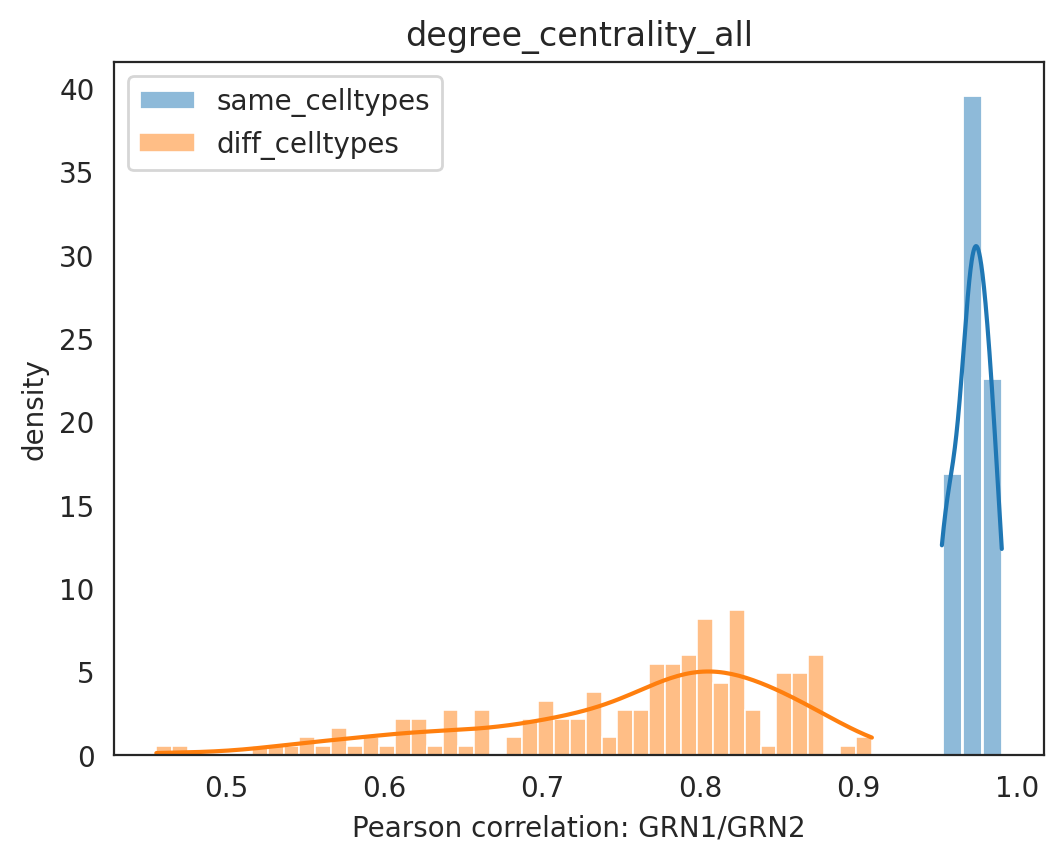

In [90]:
# define the bin width
bin_width = 0.01

# Calculate the number of bins for each histogram
num_bins1 = int((max(corr_same_celltypes) - min(corr_same_celltypes)) / bin_width)
num_bins2 = int((max(corr_diff_celltypes) - min(corr_diff_celltypes)) / bin_width)

plt.figure()
sns.histplot(corr_same_celltypes, kde=True, bins=num_bins1, stat="density", label='same_celltypes')
sns.histplot(corr_diff_celltypes, kde=True, bins=num_bins2, stat="density", label='diff_celltypes')
# plt.hist(corr_same_celltypes, density=True, bins=num_bins1)
# plt.hist(corr_diff_celltypes, density=True, bins=num_bins2)
plt.xlabel("Pearson correlation: GRN1/GRN2")
plt.ylabel("density")
plt.title("degree_centrality_all")
plt.legend()

#plt.savefig("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/network_plots_TDR118/QC_corr_centrality_TDR118_TDR119_allCelltypes.pdf")
plt.savefig("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/zebrahub-multiome-analysis/figures/network_plots_TDR118/QC_corr_centrality_TDR118_TDR119_allCelltypes.png")
plt.show()

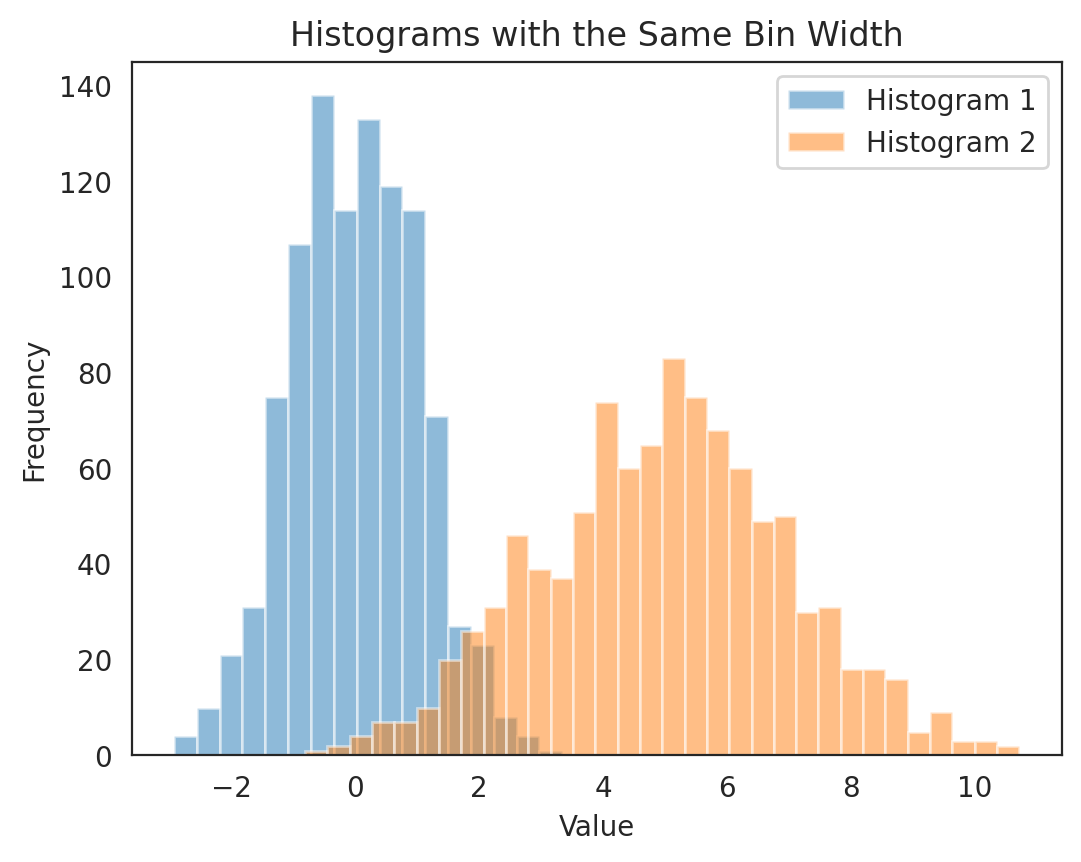

In [64]:
# Sample data for two histograms
data1 = np.random.normal(0, 1, 1000)  # Example data for the first histogram
data2 = np.random.normal(5, 2, 1000)  # Example data for the second histogram

# Determine the bin width using a common formula (Scott's Rule)
bin_width = 3.5 * min(np.std(data1), np.std(data2)) / (len(data1)**(1/3))

# Calculate the number of bins for each histogram
num_bins1 = int((max(data1) - min(data1)) / bin_width)
num_bins2 = int((max(data2) - min(data2)) / bin_width)

# Create histograms with the same bin width
plt.hist(data1, bins=num_bins1, alpha=0.5, label='Histogram 1')
plt.hist(data2, bins=num_bins2, alpha=0.5, label='Histogram 2')

plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms with the Same Bin Width')
plt.show()

In [52]:
# define a function to compute the correlation of network_metrics (per gene) between two GRNs
# GRN1, GRN2: two GRNs (filtered Links object)
# celltype1, celltype2: cell-types
# network_metric: network topology metrics, i.e. degree_centrality_all

def compute_corr_betwn_GRNs(GRN1, GRN2, celltype1, celltype2, network_metric):
    df1 = df_GRN1[df_GRN1.cluster==celltype1]
    df2 = df_GRN2[df_GRN2.cluster==celltype2]

    # Step 1. Get a union of gene_names
    gene_names = set(df1.index).union(df2.index)
    len(gene_names)

    # Step 2. Create a new dataframe with matching indices
    new_df1 = df1[df1.index.isin(gene_names)]
    new_df2 = df2[df2.index.isin(gene_names)]

    # Step 3. Fill missing values with 0
    new_df1 = new_df1.reindex(gene_names) #fill_value=0
    new_df2 = new_df2.reindex(gene_names)

    # Step 4. Create the zipped DataFrame
    zipped_df = pd.DataFrame({'metric_df1': new_df1[network_metric], 'metric_df2': new_df2[network_metric]})
    zipped_df

#     # Step 5. Generate scatter plots, with Pearson correlation coeff.
#     plt.scatter(x=zipped_df.metric_df1,
#                 y=zipped_df.metric_df2)
#     plt.xlabel("TDR118: "+ network_metric + "_" + celltype1)
#     plt.ylabel("TDR119: "+ network_metric + "_" + celltype2)
#     plt.title(network_metric)


    # Annotate the plot with the correlation coefficient
    corr = zipped_df.metric_df1.corr(zipped_df.metric_df2,
                                    method = "pearson")
    return corr

In [24]:
# Step 3: Find entries in new_df1 that are not in df1
merged = new_df1.merge(df1, left_index=True, right_index=True, how='left', indicator=True)
entries_not_in_df1 = merged[merged['_merge'] == 'left_only']
entries_not_in_df1

,degree_all_x,degree_in_x,degree_out_x,clustering_coefficient_x,clustering_coefficient_weighted_x,degree_centrality_all_x,degree_centrality_in_x,degree_centrality_out_x,betweenness_centrality_x,closeness_centrality_x,...,page_rank_y,assortative_coefficient_y,average_path_length_y,community_random_walk_y,module_y,connectivity_y,participation_y,role_y,cluster_y,_merge
neurod1,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
six2a,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
fam49al,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
spry4,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
ptprna,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
onecut1,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
egfl6,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
akap12b,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
tubb5,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
etv1,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
